# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

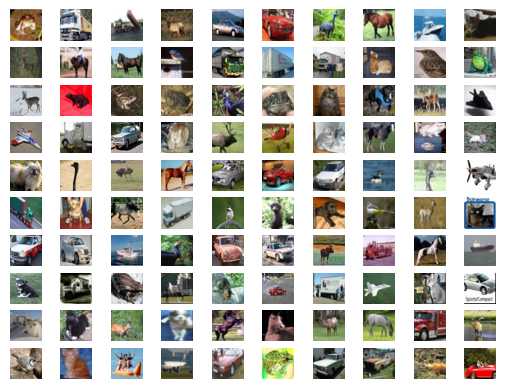

In [2]:
# Create a 10 x 10 plot showing 10 random samples from each class.
import matplotlib.pyplot as plt

for i in range(10):
    for j in range(10):
        plt.subplot(10, 10, i*10+j+1)
        plt.imshow(x_train[i*10+j])
        plt.axis('off')
plt.show()

In [3]:
# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)

print(x_test.shape)

(50000, 32, 32, 3)
4
uint8
(10000, 32, 32, 3)


In [4]:
# Normalize the images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [5]:
from keras.backend import clear_session
clear_session()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [7]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer= 'sgd', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.1646 - loss: 2.2607 - val_accuracy: 0.2460 - val_loss: 2.1288
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2600 - loss: 2.0920 - val_accuracy: 0.2797 - val_loss: 2.0095
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2996 - loss: 1.9955 - val_accuracy: 0.3140 - val_loss: 1.9526
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3186 - loss: 1.9415 - val_accuracy: 0.3209 - val_loss: 1.9258
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3351 - loss: 1.9053 - val_accuracy: 0.3488 - val_loss: 1.8737
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3506 - loss: 1.8742 - val_accuracy: 0.3581 - val_loss: 1.8433
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3612 - loss: 1.8387 - val_accuracy: 0.3685 - val_loss: 1.8190
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3727 - loss: 1.8142 - val_accuracy: 0.3600 - v

*   Plot the cross entropy loss curve and the accuracy curve

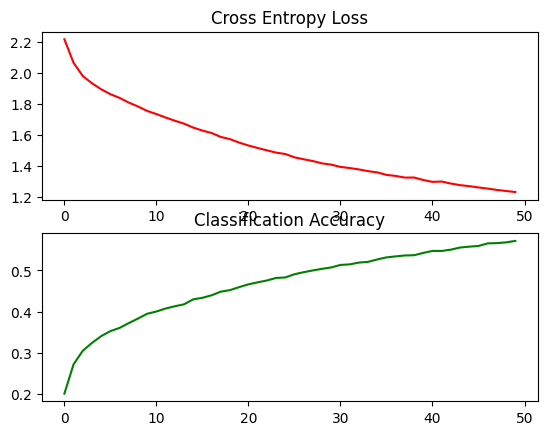

In [8]:
# Plot Cross Entropy Loss curve
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='red', label='train')


# Plot accuracy curve
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.show()


In [9]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'Test accuracy: {test_acc:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5534 - loss: 1.2591
Test accuracy: 0.55


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [10]:
from keras.backend import clear_session
clear_session()

In [11]:
# Define the model
model_vgg = Sequential()
model_vgg.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_vgg.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2)))
model_vgg.add(Flatten())
model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(Dense(10, activation='softmax'))

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [12]:
# Compile the model
model_vgg.compile(loss='categorical_crossentropy', optimizer= 'sgd', metrics=['accuracy'])

# Train the model
history_vgg = model_vgg.fit(x_train, y_train, batch_size=512, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.1455 - loss: 2.2686 - val_accuracy: 0.2042 - val_loss: 2.1553
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2431 - loss: 2.1113 - val_accuracy: 0.2871 - val_loss: 2.0060
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2928 - loss: 2.0104 - val_accuracy: 0.2859 - val_loss: 2.0192
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.3200 - loss: 1.9404 - val_accuracy: 0.3346 - val_loss: 1.8709
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3464 - loss: 1.8744 - val_accuracy: 0.3726 - val_loss: 1.8139
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3704 - loss: 1.8120 - val_accuracy: 0.3670 - val_loss: 1.8015
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3756 - loss: 1.7799 - val_accuracy: 0.3911 - val_loss: 1.7431
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3853 - loss: 1.7566 - val_accuracy: 0.3928 - 

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


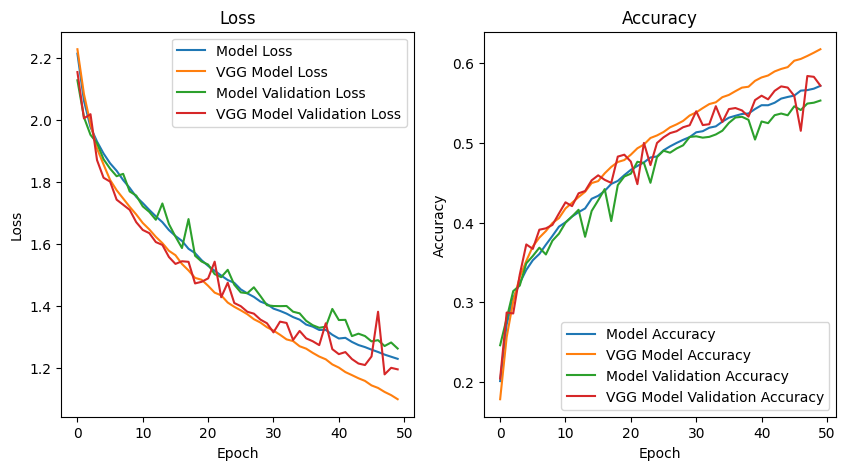

In [13]:
# Plot the loss and accuracy curves
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Model Loss')
plt.plot(history_vgg.history['loss'], label='VGG Model Loss')
plt.plot(history.history['val_loss'], label='Model Validation Loss')
plt.plot(history_vgg.history['val_loss'], label='VGG Model Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Model Accuracy')
plt.plot(history_vgg.history['accuracy'], label='VGG Model Accuracy')
plt.plot(history.history['val_accuracy'], label='Model Validation Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='VGG Model Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

**Comment on the observation**

The VGG model performs slightly better both in terms of accuracy and loss, but eventhough is far from being a good model. If we could change some paramenteretrs such as the learning curve, change the optimizer or even add some droput layers the model might improve.

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


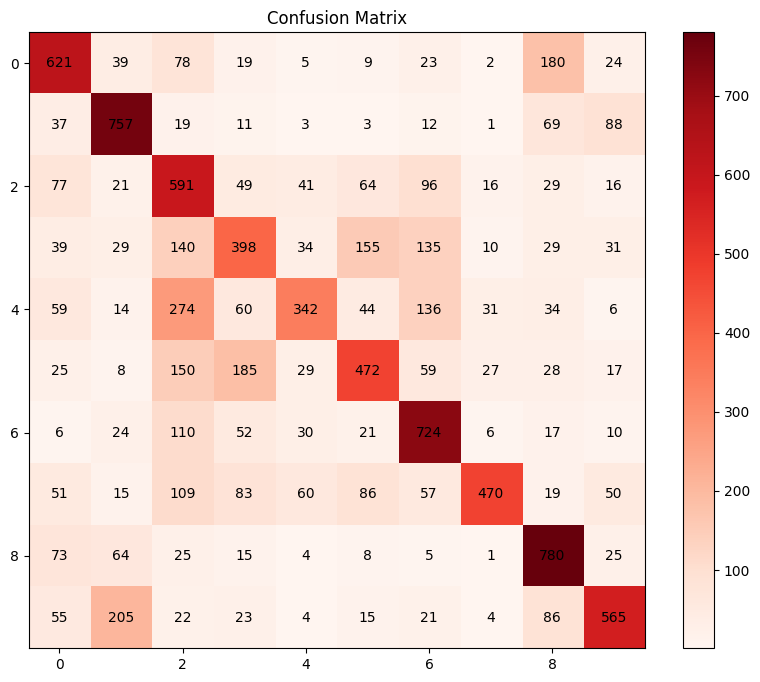

In [14]:
# Predict the output for the test split
y_pred = model_vgg.predict(x_test)

# Convert the predictions to class labels
y_pred_class = np.argmax(y_pred, axis=1)

# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_class)

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap='Reds')
plt.title('Confusion Matrix')
plt.colorbar()

# Add numbers to the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()

**Comment here :**

As we can see in the confussion matrix the model is returning many false positves / negatives, specially for labels 3 and 4 wich means that this model is having problems when trying to classify some type of images.

...

*    Print the test accuracy for the trained model.

In [16]:
# Evaluate the model on the test data
test_loss, test_acc = model_vgg.evaluate(x_test, y_test)

print(f'Test accuracy: {test_acc:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5722 - loss: 1.1876
Test accuracy: 0.57


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [17]:
from keras.backend import clear_session
clear_session()

In [18]:
import tensorflow as tf

# To make the model reproducible first we will have to resize the images to 64x64 as we have chenge the input shape to 64x64

# Resize the images to 64x64
x_train = tf.image.resize(x_train, (64, 64))
x_test = tf.image.resize(x_test, (64, 64))

# Define the model
model_vgg2 = Sequential()
model_vgg2.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model_vgg2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_vgg2.add(MaxPooling2D(pool_size=(2, 2)))

model_vgg2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg2.add(MaxPooling2D(pool_size=(2, 2)))

model_vgg2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg2.add(MaxPooling2D(pool_size=(2, 2)))

model_vgg2.add(Flatten())
model_vgg2.add(Dense(128, activation='relu'))
model_vgg2.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [19]:
# Compile the model
model_vgg2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [20]:
# Train the model
model_vgg2.fit(x_train, y_train, batch_size=512, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 113s 806ms/step - accuracy: 0.1171 - loss: 2.3004 - val_accuracy: 0.1326 - val_loss: 2.2905
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 65s 364ms/step - accuracy: 0.1493 - loss: 2.2832 - val_accuracy: 0.1841 - val_loss: 2.2323
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 370ms/step - accuracy: 0.2089 - loss: 2.1903 - val_accuracy: 0.2354 - val_loss: 2.1093
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 370ms/step - accuracy: 0.2536 - loss: 2.0883 - val_accuracy: 0.2734 - val_loss: 2.0722
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 369ms/step - accuracy: 0.3061 - loss: 1.9815 - val_accuracy: 0.3320 - val_loss: 1.8861
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 370ms/step - accuracy: 0.3239 - loss: 1.9086 - val_accuracy: 0.3205 - val_loss: 1.9184
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 370ms/step - accuracy: 0.3451 - loss: 1.8584 - val_accuracy: 0.3282 - val_loss: 1.9357
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 364ms/step - accuracy: 0.3638 - loss: 1.7975 - val_acc

In [21]:
# Evaluate the model on the test data
test_loss, test_acc = model_vgg2.evaluate(x_test, y_test)

print(f'Test accuracy: {test_acc:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4259 - loss: 1.6373
Test accuracy: 0.42


Even worse accuracy than the previous models probably because of the low epochs, it is difficult to compare due to this issue. We should increase the epochs to 50 to make fair comparison.

In [22]:
# Predict the output for the test split
y_pred = model_vgg2.predict(x_test)

# Convert the predictions to class labels
y_pred_class = np.argmax(y_pred, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


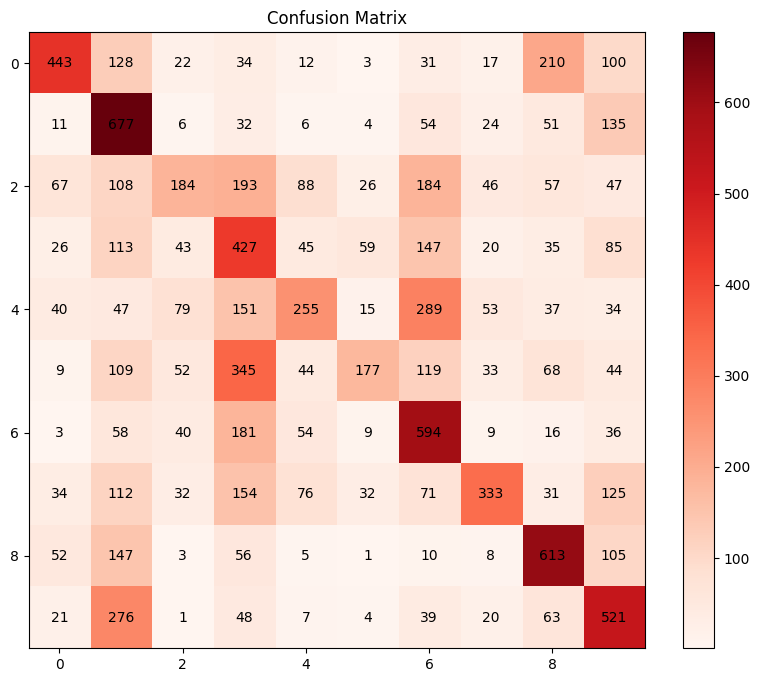

In [23]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_class)

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap='Reds')
plt.title('Confusion Matrix')
plt.colorbar()

# Add numbers to the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()

Thsi is the worst performing model also with the confussion matrix but to be fair we should increase the number of epochs to have a good comparison.

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions help to introduce non-linearity into the network by applying a non-linear transformation to the output of each neuron. This allows the network to learn and represent more complex relationships between inputs and outputs.

Why is it needed?

Without activation functions, a neural network would only be able to learn linear relationships between inputs and outputs. This is because the output of a neuron would simply be a weighted sum of its inputs, a.k.a linear operation. The problem is that most real-world problems involve non-linear relationships between inputs and outputs.
_

2 - Key Differences between sigmoid and softmax:
They are both activation functions usually used in the output layer. Sigmoid is mostly used for binary classification, they offer a single output they are not normalized. Softmax functions are used for multi-class classification and offer multiple outputs in the form of a vector, each representing the of the input being of a partucular class, an they are also normalizaed
_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Both are loss functions in classification problems but binary crossentropy as said by its name is more useful to classify two classes and is typically used with a sigmoid output layer while Categorical cross entropy is more useful when there are more than two classes and is typically used with a softmax output layer.

_
